In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from typing import List, Tuple

import sys
sys.path.append("..")
from util import print_answer

%matplotlib inline

## 1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма).

В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
df = pd.read_csv("gbm-data.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.loc[:, "D1":"D1776"].values
y = df["Activity"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

## 2. Обучите GradientBoostingClassifier

с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:


* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

In [4]:
def sigmoid(y_pred: np.array) -> np.array:
    return 1.0 / (1.0 + np.exp(-y_pred))

* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

In [5]:
def log_loss_results(model, X: np.array, y: np.array) -> List[float]:
    return [log_loss(y, sigmoid(y_pred)) for y_pred in model.staged_decision_function(X)]

* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

Learning rate: 1
      Iter       Train Loss   Remaining Time 
         1           1.0190           13.82s
         2           0.9192           13.65s
         3           0.8272           12.41s
         4           0.7834           12.49s
         5           0.7109           12.93s
         6           0.6368           13.39s
         7           0.5797           13.19s
         8           0.5610           12.96s
         9           0.5185           13.06s
        10           0.4984           12.63s
        20           0.1999           11.03s
        30           0.1313           10.05s
        40           0.0790            9.42s
        50           0.0511            8.89s
        60           0.0352            8.45s
        70           0.0245            7.91s
        80           0.0162            7.47s
        90           0.0114            6.99s
       100           0.0077            6.56s
       200           0.0004            1.90s


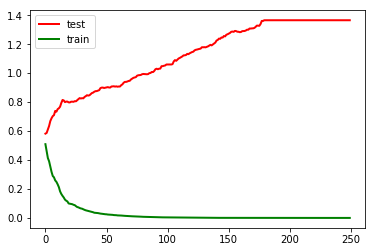

Min loss 0.58 at n_estimators=1

Learning rate: 0.5
      Iter       Train Loss   Remaining Time 
         1           1.1255           14.52s
         2           1.0035           14.00s
         3           0.9386           13.34s
         4           0.8844           13.04s
         5           0.8381           12.84s
         6           0.7995           12.23s
         7           0.7559           11.93s
         8           0.7205           11.68s
         9           0.6958           11.42s
        10           0.6725           11.56s
        20           0.4672           10.30s
        30           0.3179            9.79s
        40           0.2274            9.28s
        50           0.1774            8.79s
        60           0.1394            8.67s
        70           0.1050            8.76s
        80           0.0805            8.23s
        90           0.0650            7.78s
       100           0.0511            7.29s
       200           0.0058            2.29s


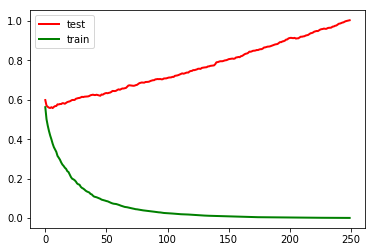

Min loss 0.56 at n_estimators=7

Learning rate: 0.3
      Iter       Train Loss   Remaining Time 
         1           1.2095           15.80s
         2           1.1006           14.38s
         3           1.0240           13.53s
         4           0.9729           14.65s
         5           0.9387           13.79s
         6           0.8948           13.84s
         7           0.8621           13.30s
         8           0.8360           12.74s
         9           0.8171           12.43s
        10           0.7883           12.58s
        20           0.6164           10.89s
        30           0.4933           10.04s
        40           0.4248            9.28s
        50           0.3345            8.95s
        60           0.2760            8.46s
        70           0.2263            8.12s
        80           0.1971            7.63s
        90           0.1693            7.17s
       100           0.1388            6.79s
       200           0.0294            2.17s


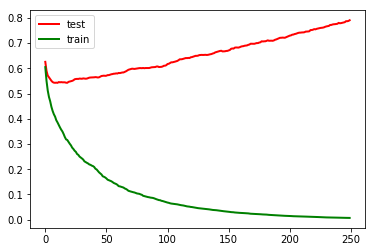

Min loss 0.54 at n_estimators=11

Learning rate: 0.2
      Iter       Train Loss   Remaining Time 
         1           1.2613           18.61s
         2           1.1715           17.96s
         3           1.1009           17.06s
         4           1.0529           16.08s
         5           1.0130           15.45s
         6           0.9740           14.95s
         7           0.9475           13.96s
         8           0.9197           14.04s
         9           0.8979           13.43s
        10           0.8730           13.29s
        20           0.7207           11.01s
        30           0.6055           10.14s
        40           0.5244            9.40s
        50           0.4501            8.90s
        60           0.3908            8.35s
        70           0.3372            7.92s
        80           0.3009            7.44s
        90           0.2603            6.99s
       100           0.2327            6.52s
       200           0.0835            2.10s


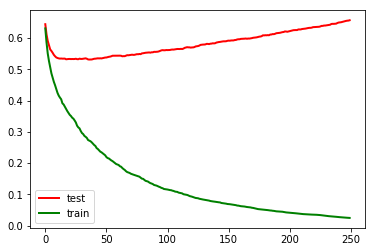

Min loss 0.53 at n_estimators=37

Learning rate: 0.1
      Iter       Train Loss   Remaining Time 
         1           1.3199           15.98s
         2           1.2645           14.59s
         3           1.2170           13.79s
         4           1.1775           14.11s
         5           1.1404           13.87s
         6           1.1106           13.70s
         7           1.0844           13.62s
         8           1.0617           13.48s
         9           1.0411           13.64s
        10           1.0223           13.53s
        20           0.8864           11.91s
        30           0.7844           10.78s
        40           0.7176            9.89s
        50           0.6590            9.21s
        60           0.6120            8.57s
        70           0.5599            8.06s
        80           0.5242            7.52s
        90           0.4829            7.08s
       100           0.4473            6.61s
       200           0.2379            2.12s


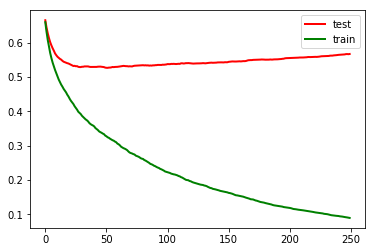

Min loss 0.53 at n_estimators=52



In [6]:
def plot_loss(learning_rate: float, test_loss: List[float], train_loss: List[float]) -> None:
    plt.figure()
    plt.plot(test_loss, "r", linewidth=2)
    plt.plot(train_loss, "g", linewidth=2)
    plt.legend(["test", "train"])
    plt.show()

min_loss_results = {}
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    print(f"Learning rate: {lr}")

    model = GradientBoostingClassifier(learning_rate=lr, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)
    
    train_loss = log_loss_results(model, X_train, y_train)
    test_loss = log_loss_results(model, X_test, y_test)
    plot_loss(lr, test_loss, train_loss)
    
    min_loss_value = min(test_loss)
    min_loss_index = test_loss.index(min_loss_value) + 1
    min_loss_results[lr] = min_loss_value, min_loss_index

    print(f"Min loss {min_loss_value:.2f} at n_estimators={min_loss_index}\n")

## 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)?

В ответе укажите одно из слов overfitting либо underfitting.

In [7]:
print_answer(1, "overfitting")

overfitting


## 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [8]:
min_loss_value, min_loss_index = min_loss_results[0.2]
print_answer(2, f"{min_loss_value:.2f} {min_loss_index}")

0.53 37


## 5. На этих же данных обучите RandomForestClassifier

с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [9]:
model = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)

print_answer(3, f"{test_loss:.2f}")

0.54
